One must have it to give a lecture named it.
Confidence is used in the common sense, although we do endow it with a mathematical definition to scare business majors, who aren't actually impressed, but indifferent.
Approximately: if, under some reasonable assumptions (probabilistic model), we estimate the probability of some event to be $P\%$, we say we have $P\%$ confidence in it.
I mean, business majors are all, "Supply and demand? Let's call that a 'law,'" so I think we're even.

So we're back to computing probability from distributions&mdash;probability density functions (PDFs) and probability mass functions (PMFs).
Usually we care most about estimating the mean of our distribution.
Recall from the previous lecture that when several samples are taken, each with its own mean, the mean is itself a random variable&mdash;with a mean, of course.
[Meanception](http://ricopic.one/resources/inception.gif).

But, more importantly (just kidding&mdash;equally so), the mean has a probability distribution of its own.
The *central limit theorem* has as one of its implications that, as the sample size $N$ gets large, *regardless of the sample distributions*, [*this distribution of means approaches the Gaussian distribution*](http://ricopic.one/resources/mind_blown.gif).

But sometimes I always worry I'm being lied to, so let's check.

In [106]:
clear; close all; % clear kernel

In [107]:
save_figures = true; % save flag

### Generate some data to test the central limit theorem

Data can be generated by constructing an array using a (seeded for consistency) random number generator.
Let's use a uniformly distributed PDF between `0` and `1`.

In [108]:
N = 150; % sample size (number of measurements per sample)
M = 120; % number of samples
n = N*M; % total number of measurements
mu_pop = 0.5; % because it's a uniform PDF between 0 and 1

rng(11); % seed the random number generator
signal_a = rand(N,M); % uniform PDF
size(signal_a) % check the size


ans =

   150   120



Let's take a look at the data by plotting the first ten samples (columns), as shown in \autoref{fig:confidence_raw}.

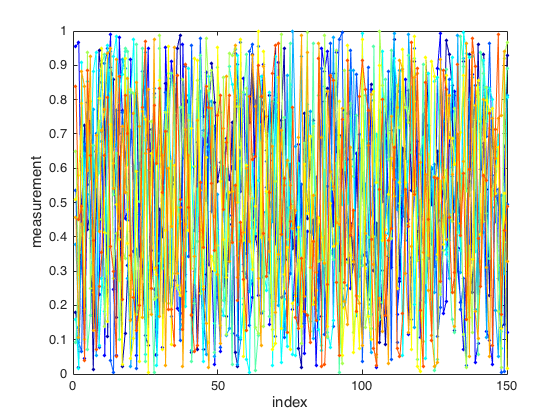

In [109]:
samples_to_plot = 10;
h = figure;
c = jet(samples_to_plot); % color array
for j=1:samples_to_plot
    plot(signal_a(:,j),'o-',...
        'Color',c(j,:),...
        'MarkerFaceColor',c(j,:),...
        'MarkerEdgeColor','none',...
        'MarkerSize',3);
    hold on;
end
hold off
xlabel('index');
ylabel('measurement');
hgsave(h,'figures/temp');

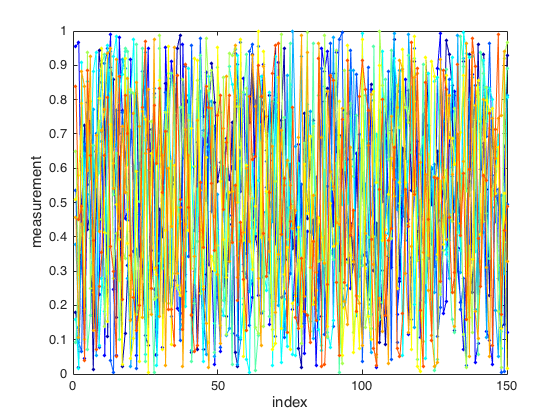

In [110]:
if save_figures
    fn = 'confidence_raw.tex';
    h = hgload('figures/temp',struct('Visible','Off'));
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

This is something like what we might see for continuous measurement data.
Now, the histogram.

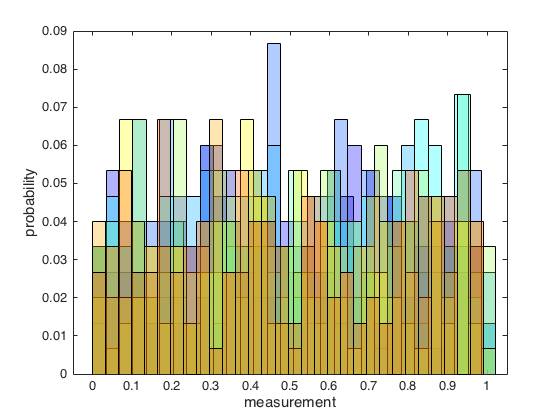

In [111]:
samples_to_plot = 10;
h = figure;
c = jet(samples_to_plot); % color array
for j=1:samples_to_plot
    histogram(signal_a(:,j),...
        30, ... % number of bins
        'facecolor',c(j,:),...
        'facealpha',.3,...
        'normalization','probability'... % for PMF
    );
    hold on;
end
hold off;
xlim([-.05,1.05])
xlabel('measurement')
ylabel('probability')
hgsave(h,'figures/temp');

This isn't a great plot, but it shows roughly that each sample is fairly uniformly distributed.

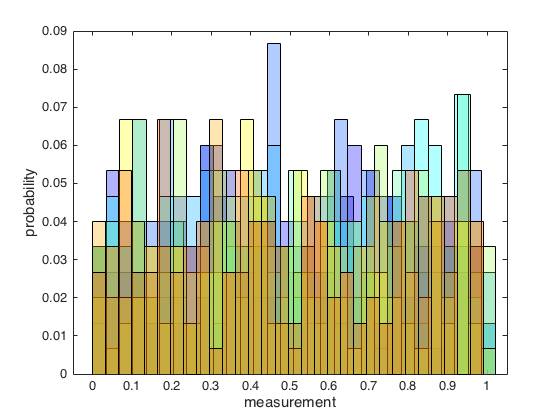

In [112]:
if save_figures
    fn = 'confidence_hist_1.tex';
    h = hgload('figures/temp',struct('Visible','Off'));
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

### Sample statistics

Now let's check out the sample statistics.
We want the sample mean and standard deviation of each column.
Let's use the built-in functions `mean` and `std`.

In [113]:
mu_a = mean(signal_a,1); % mean of each column
s_a = std(signal_a,1); % std of each column

Now we can compute the mean statistics, both the mean of the mean $\overline{\overline{X}}$ and the standard deviation of the mean $s_{\overline{X}}$, which we don't strictly need for this part, but we're curious.
We choose to use the direct estimate instead of the $s_X/\sqrt{N}$ formula, but they should be close.

In [114]:
mu_mu = mean(mu_a)
s_mu = std(mu_a)


mu_mu =

    0.4987


s_mu =

    0.0236



### The truth about sample means

It's the moment of truth.
Let's look at the distribution.

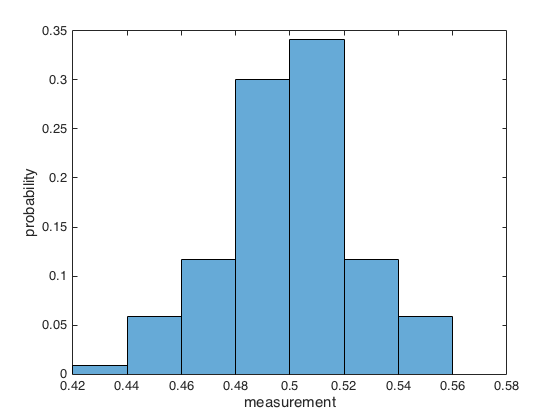

In [115]:
h = figure;
histogram(mu_a,...
    'normalization','probability'... % for PMF
);
hold off;
xlabel('measurement')
ylabel('probability')
hgsave(h,'figures/temp');

This looks like a Gaussian distribution about the mean of means, so I guess the central limit theorem is legit.

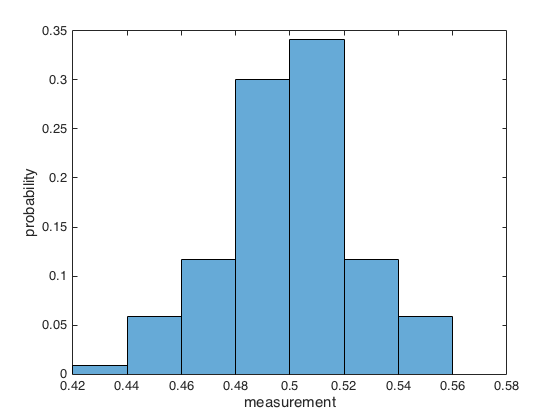

In [116]:
if save_figures
    fn = 'confidence_hist_2.tex';
    h = hgload('figures/temp',struct('Visible','Off'));
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

### Gaussian and probability

We already know how to compute the probability $P$ a value of a random variable $X$ lies in a certain interval from a PMF or PDF (the sum or the integral, respectively).
This means that, for sufficiently large sample size $N$ such that we can assume from the central limit theorem that the sample means $\overline{x_i}$ are normally distributed, *the probability a sample mean value* $\overline{x_i}$ *is in a certain interval* is given by integrating the Gaussian PDF.
The Gaussian PDF for random variable $Y$ representing the sample means is 
\begin{align}
	f(y) &= \frac{1}{\sigma\sqrt{2\pi}} \exp{\frac{-(y-\mu)^2}{2\sigma^2}}.
\end{align}
where $\mu$ is the population mean and $\sigma$ is the population standard deviation.


The integral of $f$ over some interval is the probability a value will be in that interval.
Unfortunately, that integral is uncool.
It gives rise to the definition of the *error function*, which, for the Gaussian random variable $Y$, is
\begin{align}
    \text{erf}(y_b) = \frac{1}{\sqrt{\pi}} \int_{-y_b}^{y_b} e^{-t^2} dt.
\end{align}
This expresses the probability a sample mean being in the interval $[-y_b,y_b]$ if $Y$ has mean $0$ and variance $1/2$.

Matlab has this built-in as `erf`.
Let's plot it.

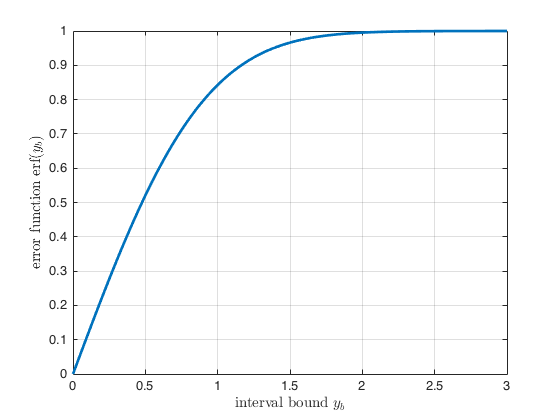

In [147]:
y_a = linspace(0,3,100);
h = figure;
p1 = plot(y_a,erf(y_a));
p1.LineWidth = 2;
grid on
xlabel('interval bound $y_b$','interpreter','latex')
ylabel('error function $\textrm{erf}(y_b)$','interpreter','latex')
hgsave(h,'figures/temp');

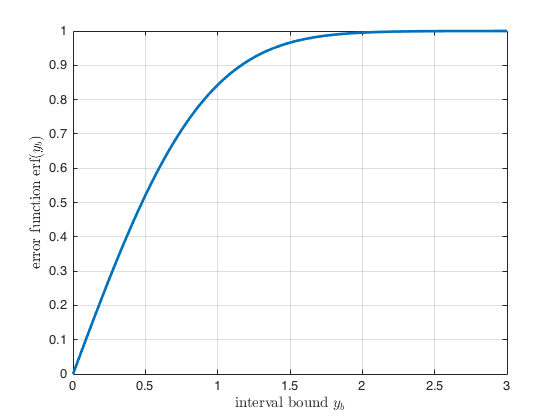

In [148]:
if save_figures
    fn = 'confidence_erf.tex';
    h = hgload('figures/temp',struct('Visible','Off'));
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

We could deal directly with the error function, but most people don't and we're weird enough, as it is.
Instead, people use the *Gaussian cumulative distribution function* $\Phi:\mathbb{R}\rightarrow\mathbb{R}$, which is defined as
\begin{align}
    \Phi(z) = \frac{1}{2} \left(1+\textrm{erf}\left(\frac{z}{\sqrt{2}}\right)\right)
\end{align}
and which expresses the probability of a Gaussian random variable $Z$ with mean $0$ and standard deviation $1$ taking on a value in the interval $(-\infty,z]$.

That's great and all, but occasionally we have Gaussian random variables with nonzero means and nonunity standard deviations.
It turns out we can shift any Gaussian random variable by its mean and scale it by its standard deviation to make it have zero mean and standard deviation.
We can then use $\Phi$ and interpret the results as being relative to the mean and standard deviation, using phrases like "the probability it is within two standard deviations of its mean."
The transformed random variable $Z$ and its values $z$ are sometimes called the *z-score*.
For a particular value $x$ of a random variable $X$, we can compute its $z$-score (or value $z$ of random variable $Z$) with the formula
\begin{align}
    z = \frac{x - \mu_X}{\sigma_X}
\end{align}
and compute the probability of $X$ taking on a value within the interval, say, $x\in [x_{b-},x_{b+}]$ from the table.
(Sample statistics $\overline{X}$ and $S_X$ are appropriate when population statistics are unknown.)

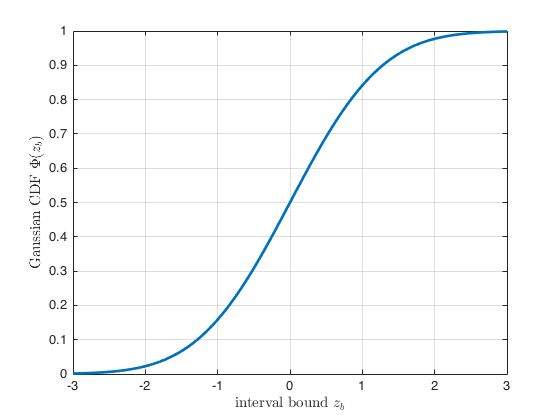

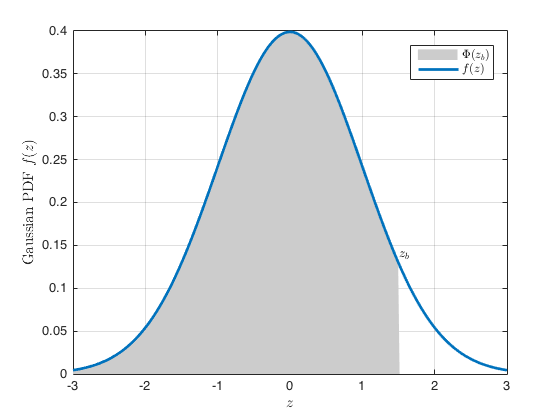

In [149]:
z_a = linspace(-3,3,300);
threshold = 1.5;
a_pdf = @(z) (z<threshold).*normpdf(z,0,1);
h1 = figure;
a1 = area(z_a,a_pdf(z_a)); hold on
a1.LineStyle = 'none';
a1.FaceColor = [.8,.8,.8];
p1 = plot(z_a,normpdf(z_a,0,1));
p1.LineWidth = 2;
grid on
xlabel('$z$','interpreter','latex')
ylabel('Gaussian PDF $f(z)$','interpreter','latex')
t1 = text(1.5,normpdf(1.5,0,1)+.01,'$z_b$');
t1.Interpreter = 'latex';
l = legend('$\Phi(z_b)$','$f(z)$');
l.Interpreter = 'latex';
hgsave(h1,'figures/temp1');

h2 = figure;
p1 = plot(z_a,1/2*(1+erf(z_a/sqrt(2))));
p1.LineWidth = 2;
grid on
xlabel('interval bound $z_b$','interpreter','latex')
ylabel('Gaussian CDF $\Phi(z_b)$','interpreter','latex')
hgsave(h2,'figures/temp2');

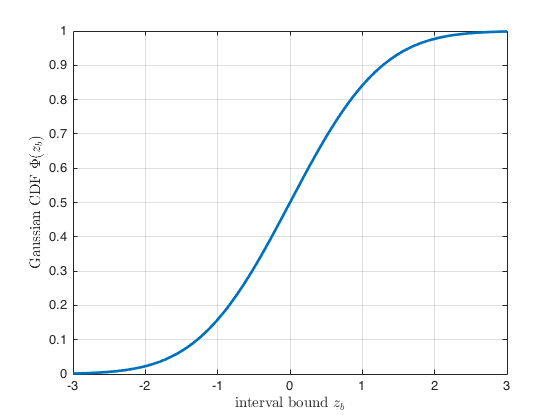

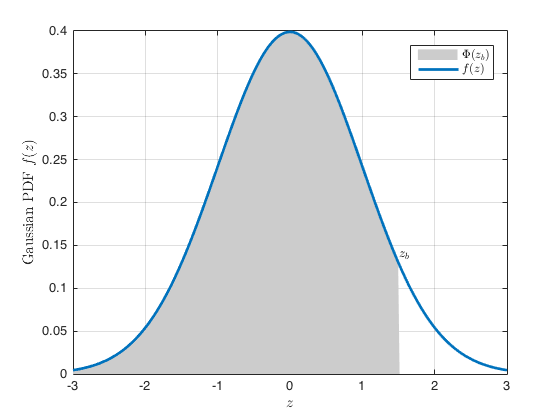

In [150]:
if save_figures
    fn1 = 'confidence_gaussian_pdf.tex';
    fn2 = 'confidence_gaussian_cdf.tex';
    h1 = hgload('figures/temp1');
    cleanfigure;
    matlab2tikz(['figures/',fn1],...
        'figurehandle',h1,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed},',...
            'stack plots=false,'...
        ],...
        'showInfo', false...
    );
    h2 = hgload('figures/temp2');
    cleanfigure;
    matlab2tikz(['figures/',fn2],...
        'figurehandle',h2,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end



For instance, compute the probability a Gaussian random variable $X$ with $\mu_X = 5$ and $\sigma_X = 2.34$ takes on a value within the interval $x\in [3,6]$.

1. Compute the $z$-score of each endpoint of the interval:
\begin{align}
    z_3 &= \frac{3 - \mu_X}{\sigma_X} \approx -0.85 \\
    z_6 &= \frac{6 - \mu_X}{\sigma_X} \approx 0.43.
\end{align}
2. Look up the CDF values for $z_3$ and $z_6$, which are $\Phi(z_3) = 0.1977$ and $\Phi(z_6) = 0.6664$. 
3. The CDF values correspond to the probabilities $x<3$ and $x<6$. Therefore, to find the probability $x$ lies in that interval, we subtract the lower bound probability:
\begin{align}
    P(x\in [3,6]) &= P(x<6) - P(x<3) \\
    &= \Phi(6) - \Phi(3) \\
    &\approx 0.6664 - 0.1977 \\
    &\approx 0.4689.
\end{align}
So there is a $46.89\%$ probability, and therefore we have $46.89\%$ confidence, that $x\in [3,6]$.

Often we want to go the other way, estimating the symmetric interval $[x_{b-},x_{b+}]$ for which there is a given probability.
In this case, we first look up the $z$-score corresponding to a certain probability.
For concreteness, given the same population statistics above, let's find the symmetric interval $[x_{b-},x_{b+}]$ over which we have $90\%$ confidence.
From the table, we want two, symmetric $z$-scores that have CDF-value difference $0.9$.
Or, in maths,
\begin{align}
    \Phi(z_{b+}) - \Phi(z_{b-}) = 0.9 \quad \text{and} \quad z_{b+} = - z_{b-}.
\end{align}
Due to the latter relation and the additional fact that the Gaussian CDF has antisymmetry,
\begin{align}
    \Phi(z_{b+}) + \Phi(z_{b-}) = 1.
\end{align}
Adding the two $\Phi$ equations,
\begin{align}
    \Phi(z_{b+}) &= 1.9/2 \\
    &= 0.95
\end{align}
and $\Phi(z_{b-}) = 0.05$.
From the table, these correspond (with a linear interpolation) to $z_b = z_{b+} = -z_{b-} \approx 1.645$.
All that remains is to solve the $z$-score formula for $x$:
\begin{align}
    x = \mu_X + z\sigma_X.
\end{align}
From this,
\begin{align}
    x_{b+} &= \mu_X + z_{b+}\sigma_X \approx 8.849 \\
    x_{b-} &= \mu_X + z_{b-}\sigma_X \approx 1.151.
\end{align}
and $X$ has a $90\%$ confidence interval $[1.151,8.849]$.

### Example: Gaussian confidence for a mean

Consider the data set generated above.
What is our $95\%$ confidence interval in our estimate of the mean?

Assuming we have a sufficiently large data set, the distribution of means is approximately Gaussian.
Following the same logic as above, we need $z$-score that gives an upper CDF value of $(1+0.95)/2 = 0.975$.
From the table, we obtain the $z_b = z_{b+} = -z_{b-}$, below.

In [141]:
z_b = 1.96;

Now we can estimate the mean using our sample and mean statistics,
\begin{align}
    \overline{X} = \overline{\overline{X}} \pm z_b S_{S_X}.
\end{align}

In [144]:
mu_x_95 = mu_mu + [-z_b,z_b]*s_mu


mu_x_95 =

    0.4526    0.5449



This is our $95\%$ confidence interval in our estimate of the mean.